# General data preprocessing

## Data transformation

In [62]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv('D:/ds/3_heart_attack/heart.csv')

In [303]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [65]:
df1 = df.copy()

In [174]:
# this is the simplest way how to transform categorical data into numerical but I'm gonna use LabelEncoder
#df1['Sex'].replace({'M':0,'F':1},inplace=True)

In [67]:
df1.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [85]:
df1.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no gaps in our dataframe, but there is a RestingBP that has minimum values and they are zero. Let's replace the zeros with the median.

In [80]:
df1['RestingBP'] = df1['RestingBP'].fillna(df1['RestingBP'].median())

Let's replace categorical features with quantitative ones

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
for i in df1.select_dtypes(include=['object']).columns:
    df1[i] = labelencoder.fit_transform(df1[i])

Let's convert the data in the dataframe to float64

In [99]:
df1 = df1.astype('float64')

In [100]:
df1.dtypes

Age               float64
Sex               float64
ChestPainType     float64
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG        float64
MaxHR             float64
ExerciseAngina    float64
Oldpeak           float64
ST_Slope          float64
HeartDisease      float64
dtype: object

In [101]:
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0  40.0  1.0            1.0      140.0        289.0        0.0         1.0   
1  49.0  0.0            2.0      160.0        180.0        0.0         1.0   
2  37.0  1.0            1.0      130.0        283.0        0.0         2.0   
3  48.0  0.0            0.0      138.0        214.0        0.0         1.0   
4  54.0  1.0            2.0      150.0        195.0        0.0         1.0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0  172.0             0.0      0.0       2.0           0.0  
1  156.0             0.0      1.0       1.0           1.0  
2   98.0             0.0      0.0       2.0           0.0  
3  108.0             1.0      1.5       1.0           1.0  
4  122.0             0.0      0.0       2.0           0.0

# EDA

Let's look at the ratio of 1 to 0 for the target variable. We see that there is no strong imbalance of classes

In [111]:
import plotly.express as px

fig = px.histogram(df1, x="HeartDisease", color="HeartDisease", nbins=2, 
                   title="Distribution of Heart Disease",
                   labels={"HeartDisease": "Heart Disease"},
                   )
fig.update_layout(
    title={
        'text': "Distribution of Heart Disease",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Heart Disease",
    yaxis_title="Count",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#8f8f8f"
    )
)
fig.show()

Let's look at the correlation of features

<Axes: >

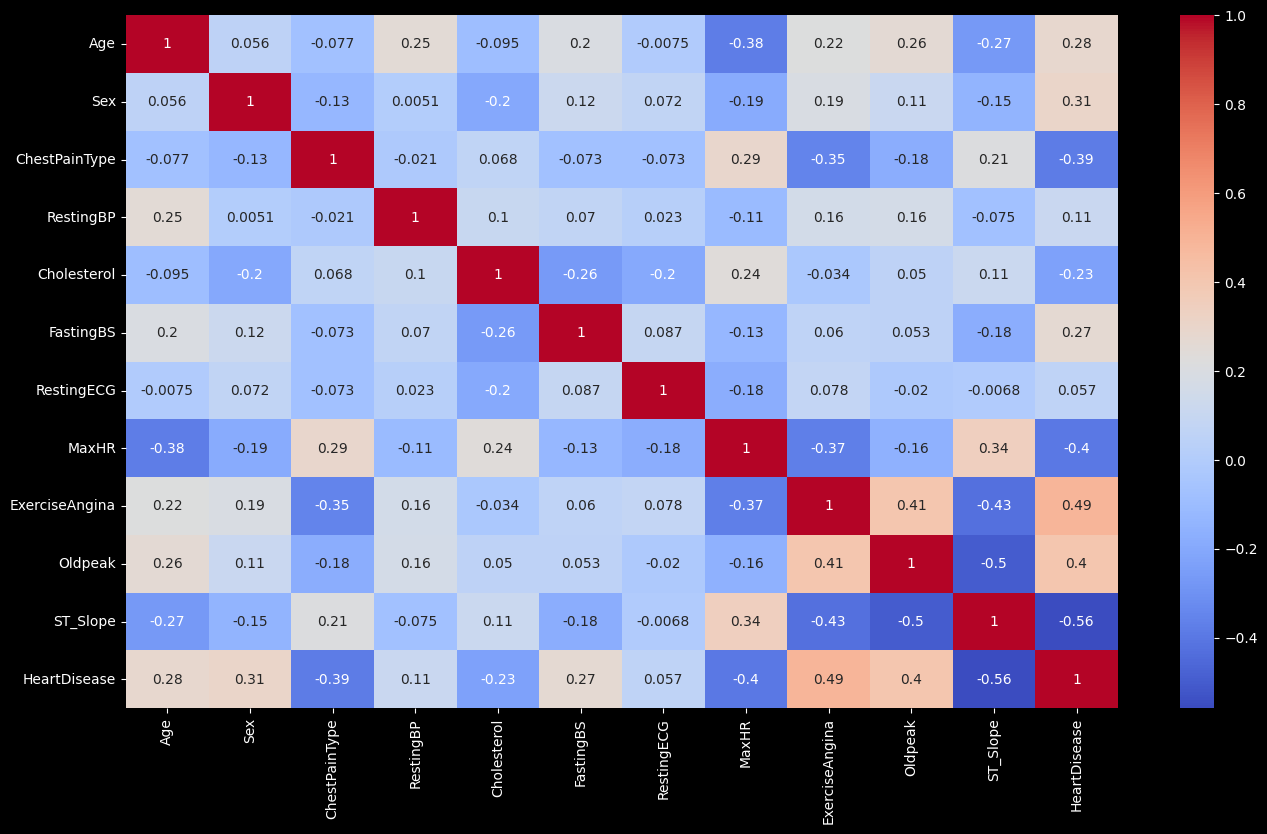

In [105]:
import seaborn as sns

plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")

Let's look at the age distribution

<Axes: title={'center': 'Age distr'}, ylabel='Frequency'>

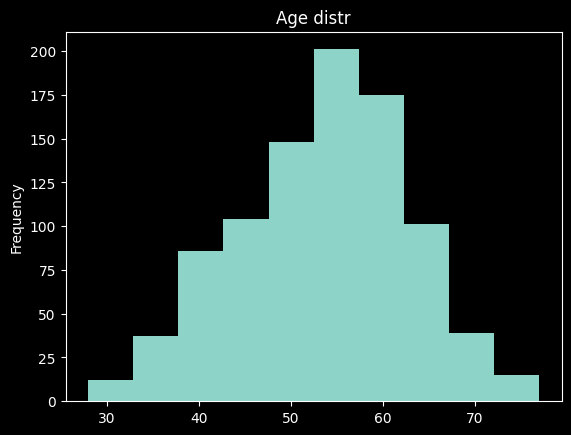

In [109]:
df1["Age"][np.logical_and(df["Age"] > 10, df1["Age"] < 99)].plot(
    kind="hist",
    title="Age distr")

Violin Plots for Each Feature against Target Variable

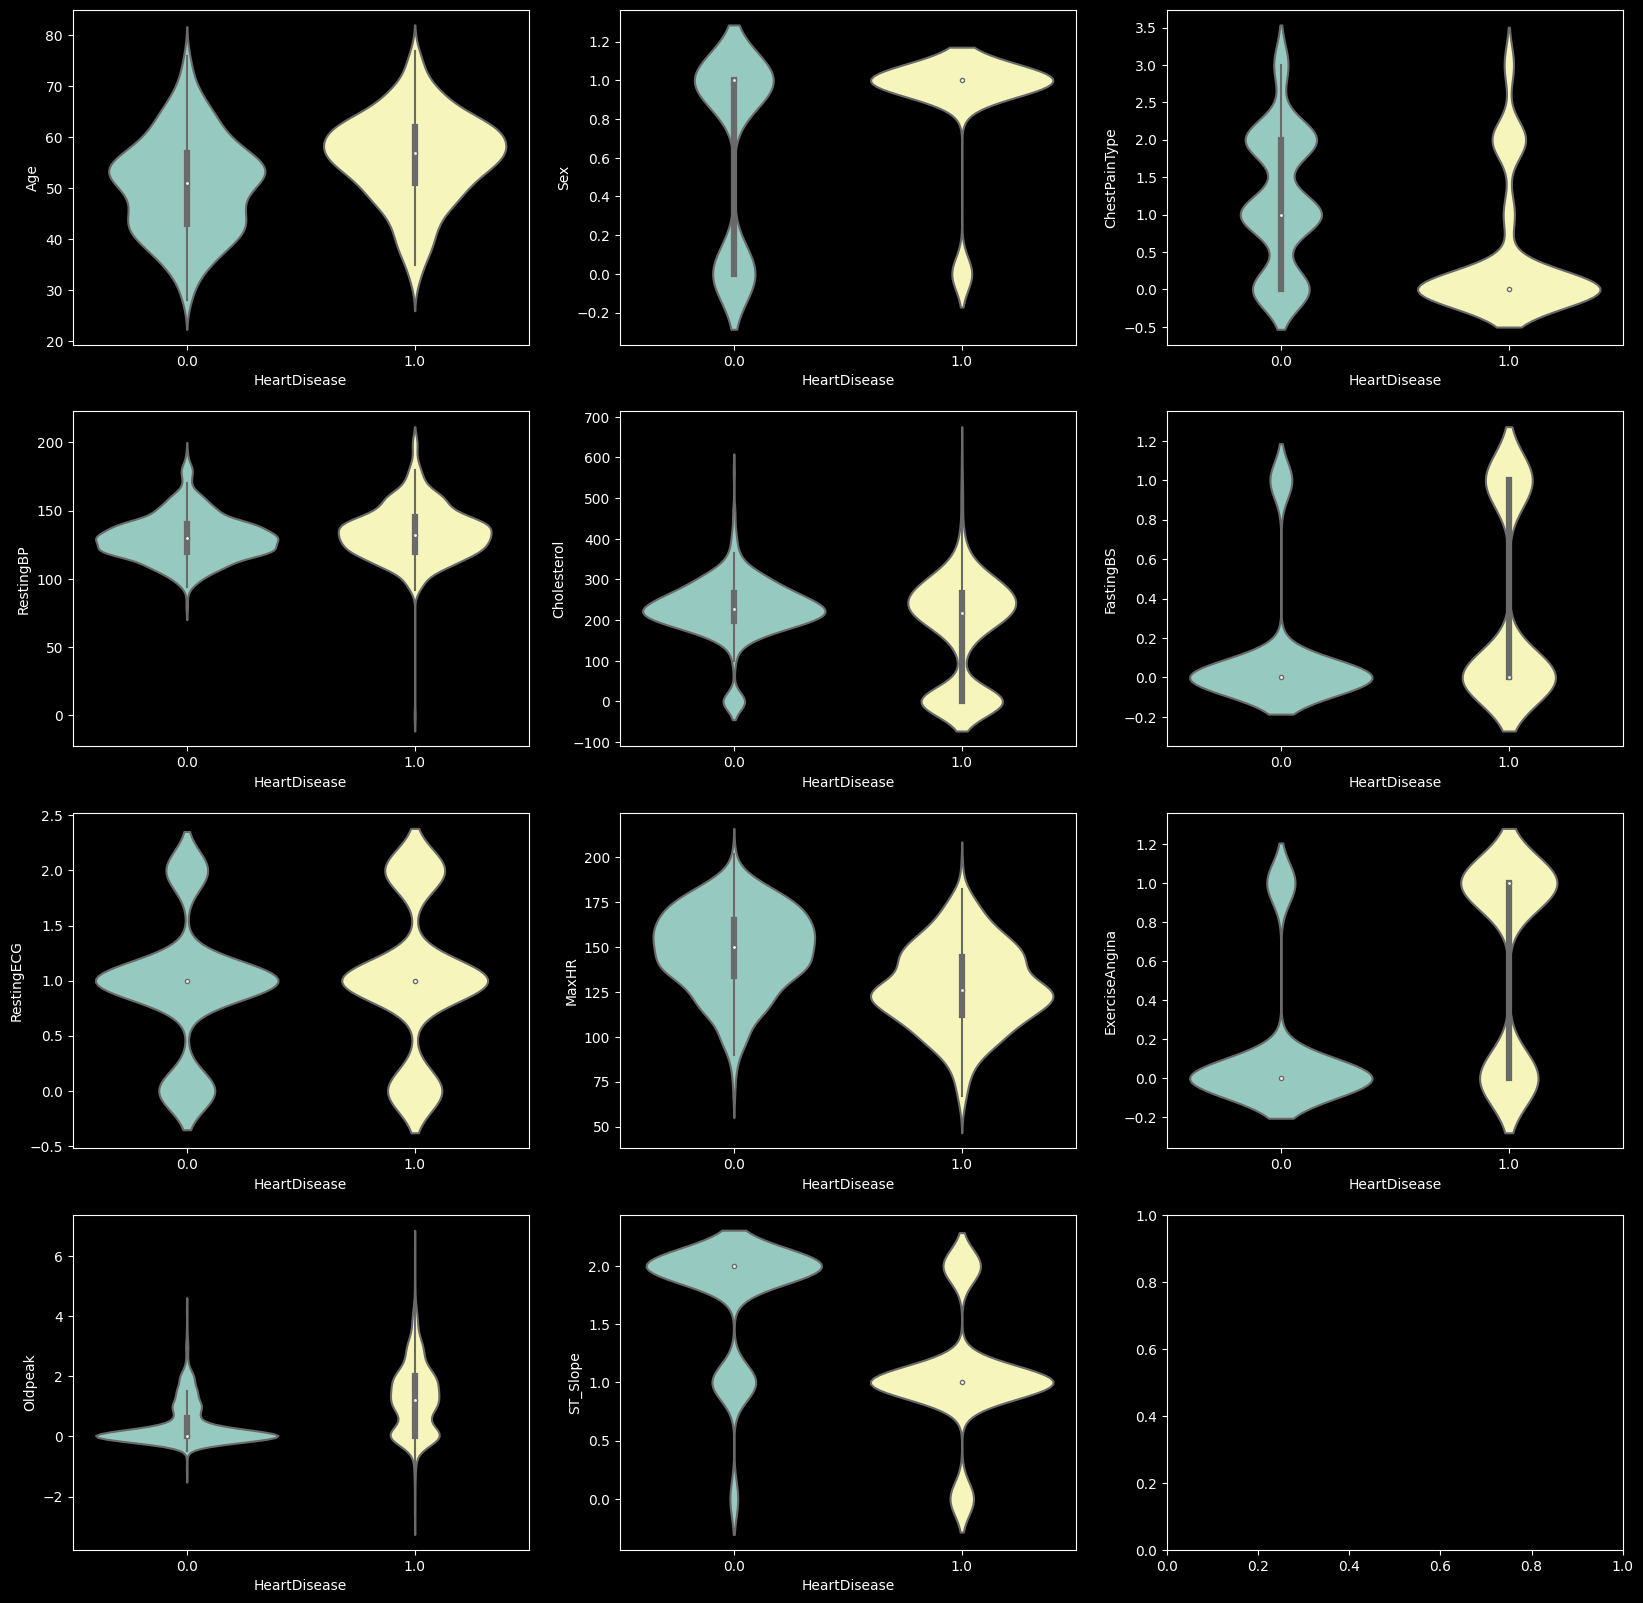

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the figure
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 20))
axs = axs.flatten()

# Loop through each variable and create a violin plot
for i, column in enumerate(df1.columns[:-1]):
    sns.violinplot(x='HeartDisease', y=column, data=df1, ax=axs[i], palette='Set3')

# Show the plot
plt.show()

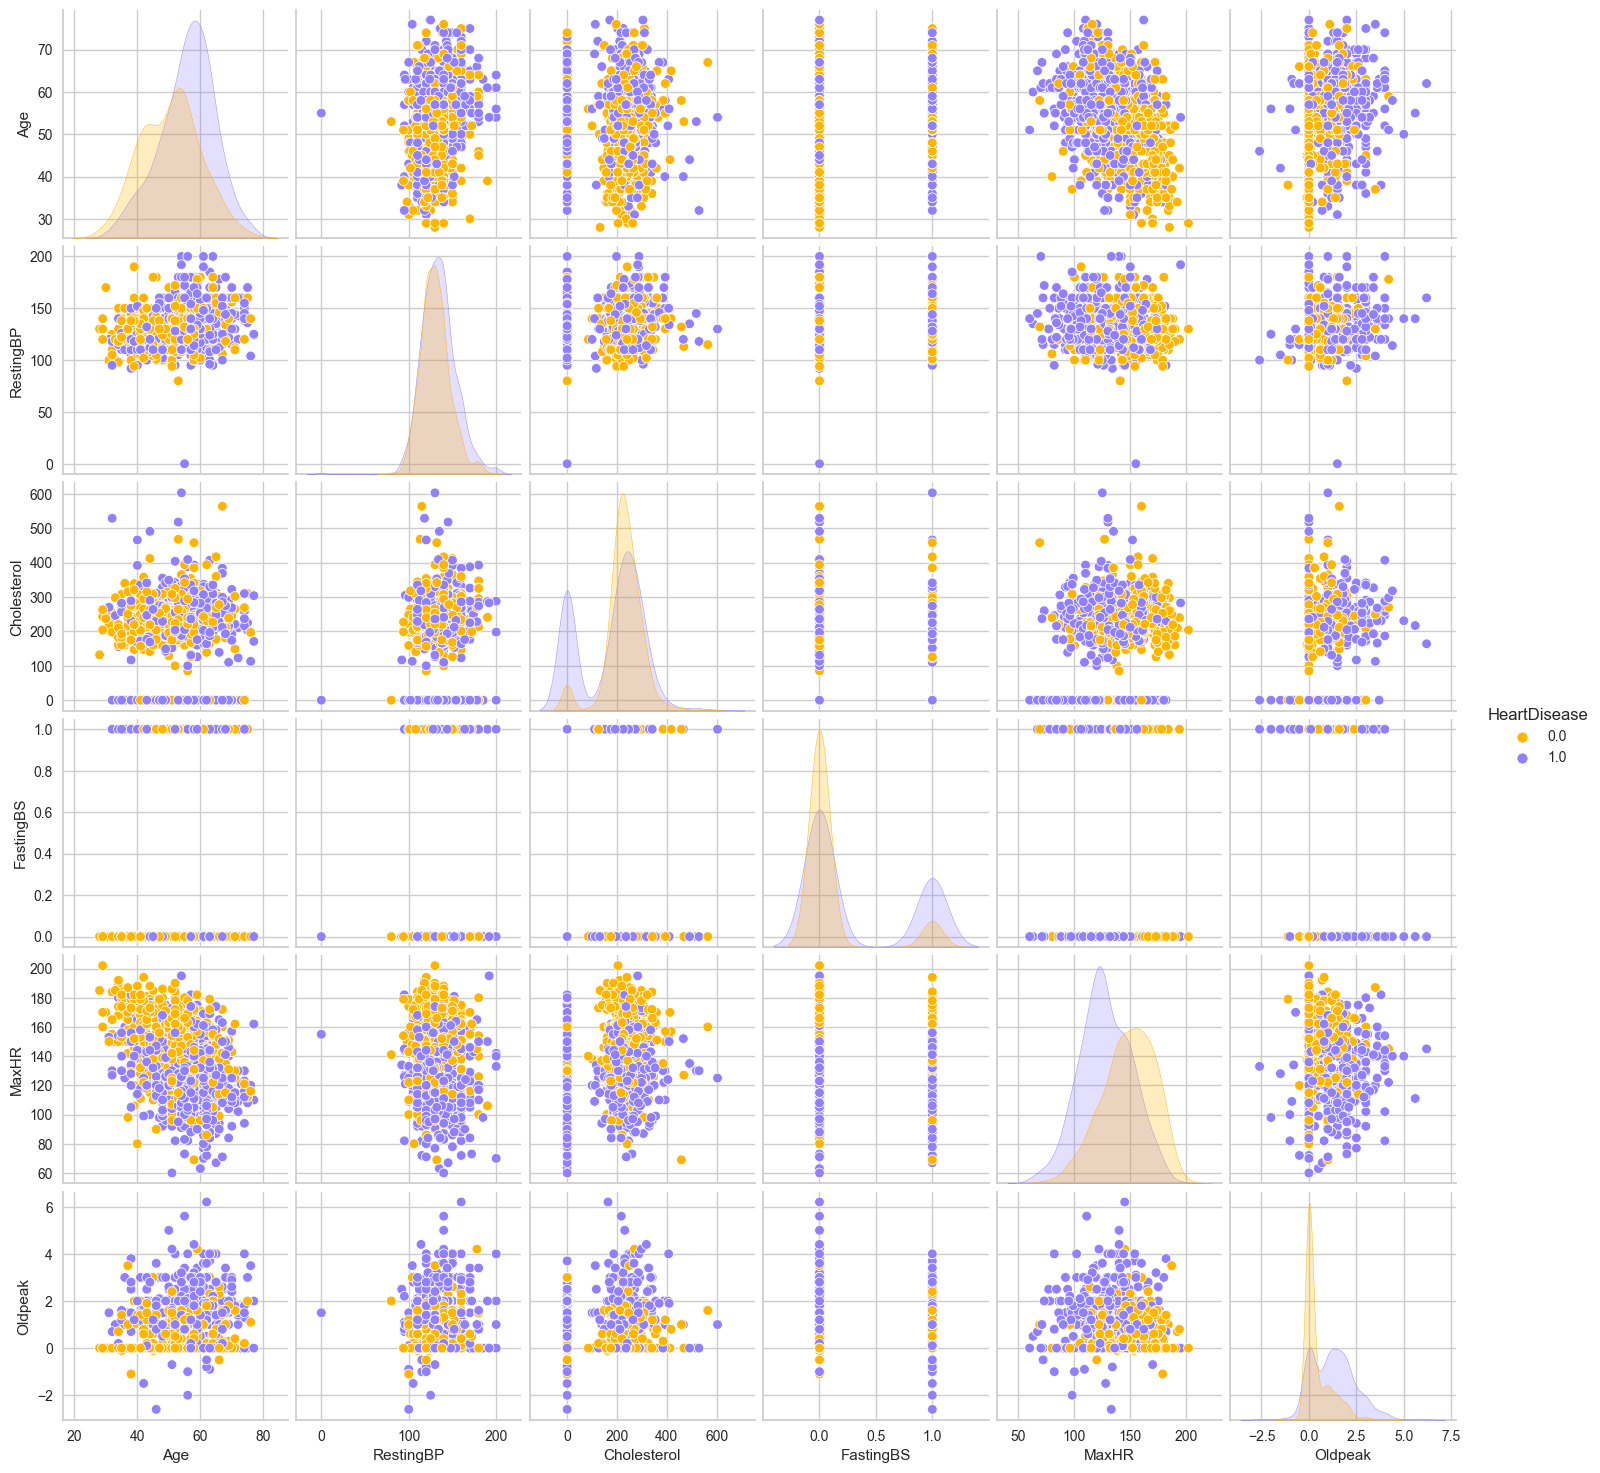

In [294]:
sns.pairplot(data=df1[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']],hue='HeartDisease', palette = ['#ffb400','#9080ff'])

# Machine Learning

Create metrics for comparing in the end

In [212]:
from sklearn.metrics import precision_score, roc_auc_score, recall_score, f1_score,log_loss

In [210]:
metrics = pd.DataFrame(index=['roc_auc','precision_score','recall_score','f1_score','log_loss'])

## PyCaret

First of all I'm going to try PyCaret just to check what he says. I don't like it at all, but everytime it's very interesting what PyCaret would say to me. I don't believe him to be honest (:

In [288]:
from pycaret.classification import *

s = setup(
    df1,
    target="HeartDisease"
)

In [289]:
best = compare_models(sort="F1", cross_validation=True)

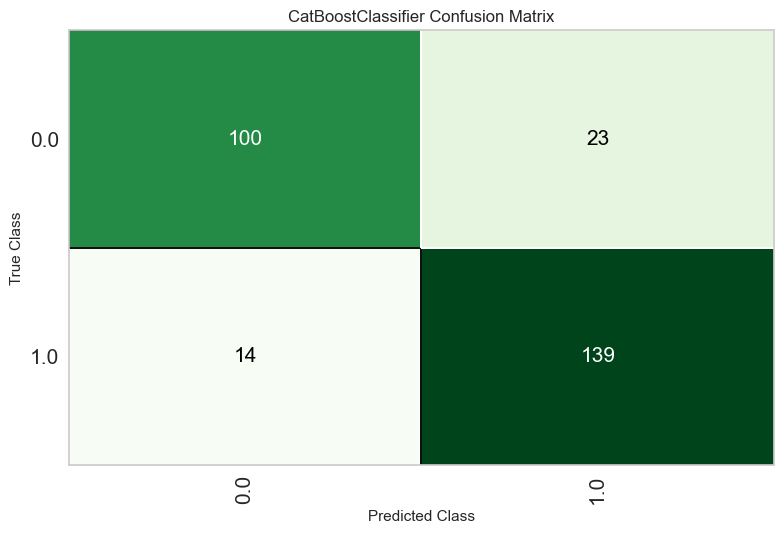

In [302]:
plot_model(best, plot="confusion_matrix")

Usually I'm using 3-5 models and comparing them to choose the best follow F1 score for example.
I'm gonna try four: 

Random Forest Classifier

Logistic Regression

Naive Bayes

Gradient Boosting Classifier

CatBoostClassifier

## CatBoostClassifier

#### Preparing model

In [127]:
X = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
y = ['HeartDisease']

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import classification_report

train, test =  train_test_split(df1,test_size=0.2,random_state=42, shuffle=True)

In [272]:
import catboost
from catboost import Pool
from catboost import CatBoostClassifier

train_data = Pool(data=train[X], 
                  label=train[y]
                 )

#### Baseline

In [166]:
model_cb = CatBoostClassifier()
model_cb.fit(train_data, verbose=200)

Learning rate set to 0.009028

0:	learn: 0.6849551	total: 6.78ms	remaining: 6.77s

200:	learn: 0.2703857	total: 1.3s	remaining: 5.15s

400:	learn: 0.2055375	total: 2.65s	remaining: 3.96s

600:	learn: 0.1682024	total: 4s	remaining: 2.66s

800:	learn: 0.1371498	total: 5.34s	remaining: 1.33s

999:	learn: 0.1146386	total: 6.7s	remaining: 0us


In [167]:
y_pred_cb = model_cb.predict(test[X])
print(classification_report(test[y], y_pred_cb))

              precision    recall  f1-score   support



         0.0       0.85      0.88      0.87        77

         1.0       0.91      0.89      0.90       107



    accuracy                           0.89       184

   macro avg       0.88      0.89      0.88       184

weighted avg       0.89      0.89      0.89       184




#### ROC AUC

In [197]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [208]:
y_score_cb = model_cb.predict_proba(test[X])[:,1]

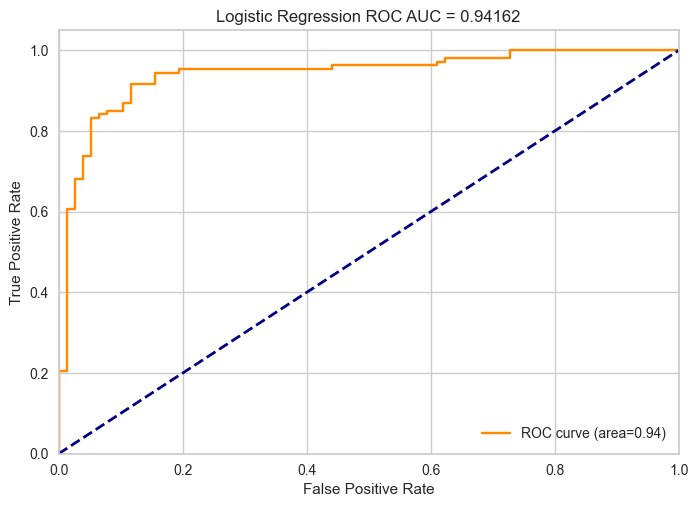

In [209]:
fpr, tpr, thresholds = roc_curve(test[y], y_score_cb)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right')
plt.show()

#### Metrics

In [215]:
metrics['catboost'] = [roc_auc_score(test[y],y_score_cb),
                         precision_score(test[y],y_pred_cb),
                         recall_score(test[y],y_pred_cb),
                         f1_score(test[y],y_pred_cb),
                         log_loss(test[y],y_pred_cb)]

In [221]:
metrics

catboost
roc_auc          0.941619
precision_score  0.913462
recall_score     0.887850
f1_score         0.900474
log_loss         4.113678

#### Conclusion

Here we can see that CatBoostClassifier built with Baseline parameters already gives to us pretty good result comparing to PyCaret gave earlier

Let's save it to our test table to a new column 'y_pred_catboost'

In [162]:
test['y_pred_catboost'] = y_pred_cb

In [163]:
test.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
668  63.0  0.0            1.0      140.0        195.0        0.0         1.0   
30   53.0  1.0            2.0      145.0        518.0        0.0         1.0   
377  65.0  1.0            0.0      160.0          0.0        1.0         2.0   
535  56.0  1.0            0.0      130.0          0.0        0.0         0.0   
807  54.0  1.0            1.0      108.0        309.0        0.0         1.0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  y_pred_catboost  
668  179.0             0.0      0.0       2.0           0.0              0.0  
30   130.0             0.0      0.0       1.0           1.0              1.0  
377  122.0             0.0      1.2       1.0           1.0              1.0  
535  122.0             1.0      1.0       1.0           1.0              1.0  
807  156.0             0.0      0.0       2.0           0.0              0.0

## Random Forest Classifier

#### Baseline

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
model_rf = RandomForestClassifier()
model_rf.fit(train[X], train[y])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [170]:
y_pred_rf = model_rf.predict(test[X])
print(classification_report(test[y], y_pred_rf))

              precision    recall  f1-score   support



         0.0       0.84      0.90      0.87        77

         1.0       0.92      0.88      0.90       107



    accuracy                           0.89       184

   macro avg       0.88      0.89      0.88       184

weighted avg       0.89      0.89      0.89       184




#### ROC AUC

In [197]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [206]:
y_score_rf = model_rf.predict_proba(test[X])[:,1]

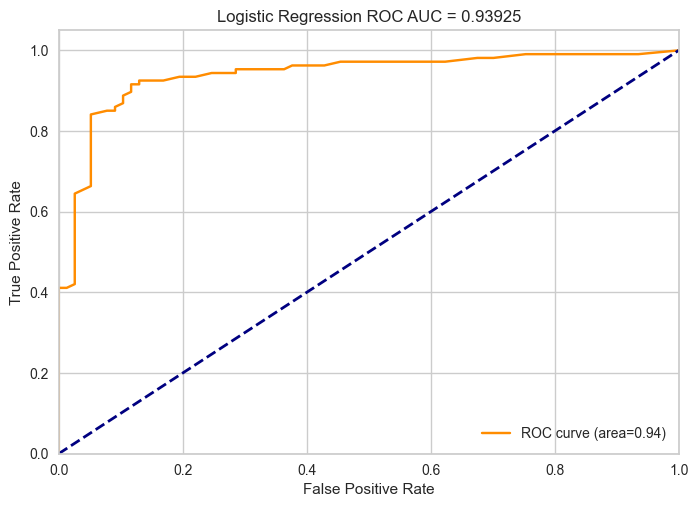

In [207]:
fpr, tpr, thresholds = roc_curve(test[y], y_score_rf)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right')
plt.show()

#### Metrics

In [222]:
metrics['random_forest'] = [roc_auc_score(test[y],y_score_rf),
                         precision_score(test[y],y_pred_rf),
                         recall_score(test[y],y_pred_rf),
                         f1_score(test[y],y_pred_rf),
                         log_loss(test[y],y_pred_rf)]

In [223]:
metrics

catboost  random_forest
roc_auc          0.941619       0.939252
precision_score  0.913462       0.921569
recall_score     0.887850       0.878505
f1_score         0.900474       0.899522
log_loss         4.113678       4.113678

#### Conlucsion

Here we can see that RandomForestClassifier built with Baseline parameters gives us also pretty good results

Let's save it to our test table to a new column 'y_pred_randforest'

In [171]:
test['y_pred_randforest'] = y_pred_rf

In [172]:
test.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
668  63.0  0.0            1.0      140.0        195.0        0.0         1.0   
30   53.0  1.0            2.0      145.0        518.0        0.0         1.0   
377  65.0  1.0            0.0      160.0          0.0        1.0         2.0   
535  56.0  1.0            0.0      130.0          0.0        0.0         0.0   
807  54.0  1.0            1.0      108.0        309.0        0.0         1.0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  y_pred_catboost  \
668  179.0             0.0      0.0       2.0           0.0              0.0   
30   130.0             0.0      0.0       1.0           1.0              1.0   
377  122.0             0.0      1.2       1.0           1.0              1.0   
535  122.0             1.0      1.0       1.0           1.0              1.0   
807  156.0             0.0      0.0       2.0           0.0              0.0   

     y_pred_randforest  
668                0.0  
30                 1.0  
377                1.0  
535                1.0  
807                0.0

# Logistic Regression

#### Baseline

In [173]:
from sklearn.linear_model import LogisticRegression

In [177]:
model_lr = LogisticRegression()

In [178]:
model_lr.fit(train[X],train[y])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
y_pred_lr = model_lr.predict(test[X])
print(classification_report(test[y], y_pred_lr))

              precision    recall  f1-score   support



         0.0       0.78      0.87      0.82        77

         1.0       0.90      0.82      0.86       107



    accuracy                           0.84       184

   macro avg       0.84      0.85      0.84       184

weighted avg       0.85      0.84      0.84       184




Here we can see that LogisticRegression give lower F1 scores and Accuracy. I'll try to tune hyperparameters to make this model better.

#### Feature engineering

In this case I'm using GridSearchcv. It's optionally. There're some tools which could be much better

In [182]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np

I'm gonna use short list of hyperparameters just as example and not to overload my laptop

In [188]:
parameters_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(1, 50, num=5),
    'solver': ['sag', 'lbfgs'],
    'l1_ratio': [0.25, 0.75],
    'max_iter': np.arange(100, 300, 100)
}

model_lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=2, shuffle=True)
grid_cv = GridSearchCV(model_lr, parameters_grid, scoring='f1', cv=cv, verbose=2)

In [190]:
from tqdm.notebook import trange, tqdm

for i in tqdm(range(100), colour='yellow'):
    grid_cv.fit(train[X],train[y].values.ravel())
    pass

  0%|          | 0/100 [00:00<?, ?it/s]

Fitting 2 folds for each of 80 candidates, totalling 160 fits

[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter=200, penalty=l1, solver=sag; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter=200, penalty=l1, solver=sag; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.25, max_iter

In [191]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8592640290903582

{'C': 1.0, 'l1_ratio': 0.25, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


In [192]:
model_lr_grid = LogisticRegression(**grid_cv.best_params_, class_weight='balanced')
model_lr_grid.fit(train[X], train[y])

y_pred_lr_grid = model_lr_grid.predict(test[X])
print(classification_report(test[y], y_pred_lr_grid))

              precision    recall  f1-score   support



         0.0       0.77      0.90      0.83        77

         1.0       0.91      0.80      0.86       107



    accuracy                           0.84       184

   macro avg       0.84      0.85      0.84       184

weighted avg       0.85      0.84      0.84       184




#### ROC AUC

In [197]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [202]:
y_score_lr_grid = model_lr_grid.predict_proba(test[X])[:,1]

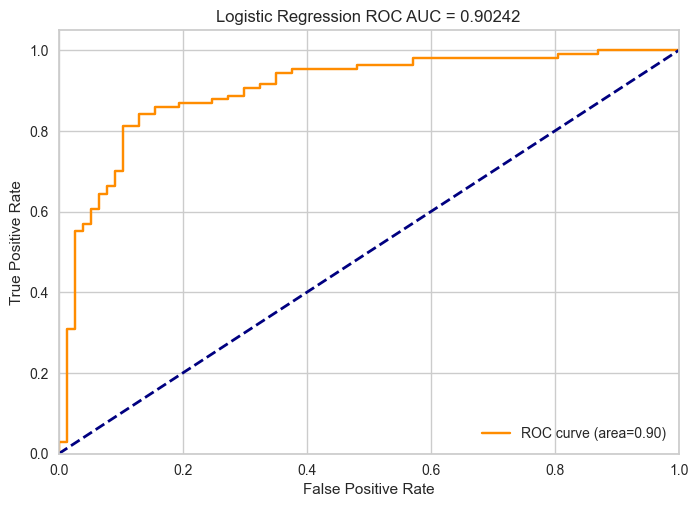

In [204]:
fpr, tpr, thresholds = roc_curve(test[y], y_score_lr_grid)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right')
plt.show()

#### Metrics

In [224]:
metrics['logistic_regression'] = [roc_auc_score(test[y],y_score_lr_grid),
                         precision_score(test[y],y_pred_lr_grid),
                         recall_score(test[y],y_pred_lr_grid),
                         f1_score(test[y],y_pred_lr_grid),
                         log_loss(test[y],y_pred_lr_grid)]

In [225]:
metrics

catboost  random_forest  logistic_regression
roc_auc          0.941619       0.939252             0.902415
precision_score  0.913462       0.921569             0.914894
recall_score     0.887850       0.878505             0.803738
f1_score         0.900474       0.899522             0.855721
log_loss         4.113678       4.113678             5.680793

#### Conlucsion

Here we can see that linear method LogisticRegression built with optimized parameters through GridSearchCV gives us also pretty good results but some worse than Random Forest and Catboost

Let's save it to our test table to a new column 'y_pred_logregression'

In [195]:
test['y_pred_logregression'] = y_pred_lr_grid

In [243]:
test.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
668  63.0  0.0            1.0      140.0        195.0        0.0         1.0   
30   53.0  1.0            2.0      145.0        518.0        0.0         1.0   
377  65.0  1.0            0.0      160.0          0.0        1.0         2.0   
535  56.0  1.0            0.0      130.0          0.0        0.0         0.0   
807  54.0  1.0            1.0      108.0        309.0        0.0         1.0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  y_pred_catboost  \
668  179.0             0.0      0.0       2.0           0.0              0.0   
30   130.0             0.0      0.0       1.0           1.0              1.0   
377  122.0             0.0      1.2       1.0           1.0              1.0   
535  122.0             1.0      1.0       1.0           1.0              1.0   
807  156.0             0.0      0.0       2.0           0.0              0.0   

     y_pred_randforest  y_pred_logregression  
668                0.0                   0.0  
30                 1.0                   0.0  
377                1.0                   1.0  
535                1.0                   1.0  
807                0.0                   0.0

# Gradient Boosting Classifier

#### Baseline

In [244]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(train[X], train[y])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [246]:
y_pred_gb = model_gb.predict(test[X])
print(classification_report(test[y], y_pred_gb))

              precision    recall  f1-score   support



         0.0       0.82      0.90      0.86        77

         1.0       0.92      0.86      0.89       107



    accuracy                           0.88       184

   macro avg       0.87      0.88      0.87       184

weighted avg       0.88      0.88      0.88       184




#### ROC AUC

In [247]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [248]:
y_score_gb = model_gb.predict_proba(test[X])[:,1]

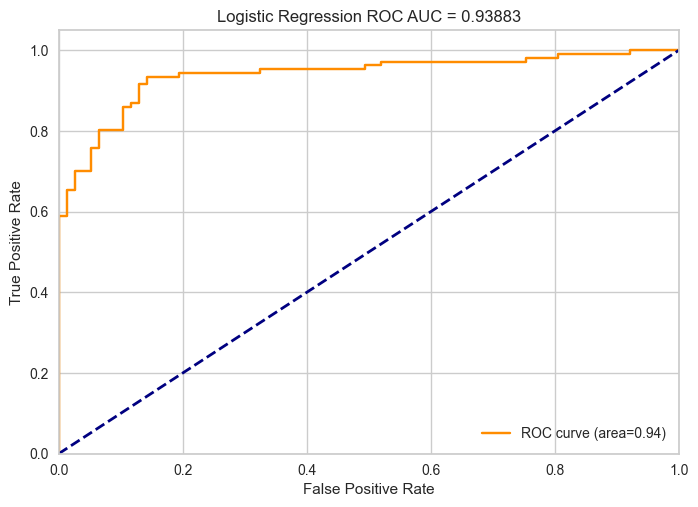

In [249]:
fpr, tpr, thresholds = roc_curve(test[y], y_score_gb)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right')
plt.show()

#### Metrics

In [250]:
metrics['gradient_boosting'] = [roc_auc_score(test[y],y_score_gb),
                         precision_score(test[y],y_pred_gb),
                         recall_score(test[y],y_pred_gb),
                         f1_score(test[y],y_pred_gb),
                         log_loss(test[y],y_pred_gb)]

In [251]:
metrics

catboost  random_forest  logistic_regression  \
roc_auc          0.941619       0.939252             0.902415   
precision_score  0.913462       0.921569             0.914894   
recall_score     0.887850       0.878505             0.803738   
f1_score         0.900474       0.899522             0.855721   
log_loss         4.113678       4.113678             5.680793   

                 gradient_boosting  
roc_auc                   0.938828  
precision_score           0.920000  
recall_score              0.859813  
f1_score                  0.888889  
log_loss                  4.505457

#### Conlucsion

Here we can see that GradientBoostingClassifier built without optimized parameters gives also pretty good results which are comparable to CatBoost and RandomForestClassifier

Let's save it to our test table to a new column 'y_pred_gradboost'

In [261]:
test['y_pred_gradboost'] = y_pred_gb

In [262]:
test.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
668  63.0  0.0            1.0      140.0        195.0        0.0         1.0   
30   53.0  1.0            2.0      145.0        518.0        0.0         1.0   
377  65.0  1.0            0.0      160.0          0.0        1.0         2.0   
535  56.0  1.0            0.0      130.0          0.0        0.0         0.0   
807  54.0  1.0            1.0      108.0        309.0        0.0         1.0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  y_pred_catboost  \
668  179.0             0.0      0.0       2.0           0.0              0.0   
30   130.0             0.0      0.0       1.0           1.0              1.0   
377  122.0             0.0      1.2       1.0           1.0              1.0   
535  122.0             1.0      1.0       1.0           1.0              1.0   
807  156.0             0.0      0.0       2.0           0.0              0.0   

     y_pred_randforest  y_pred_logregression  y_pred_gradboost  
668                0.0                   0.0               0.0  
30                 1.0                   0.0               1.0  
377                1.0                   1.0               1.0  
535                1.0                   1.0               1.0  
807                0.0                   0.0               0.0

# Naive Bayes

#### Baseline

In [255]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(train[X], train[y])

GaussianNB(priors=None, var_smoothing=1e-09)

In [256]:
y_pred_nb = model_nb.predict(test[X])
print(classification_report(test[y], y_pred_nb))

              precision    recall  f1-score   support



         0.0       0.79      0.84      0.82        77

         1.0       0.88      0.84      0.86       107



    accuracy                           0.84       184

   macro avg       0.84      0.84      0.84       184

weighted avg       0.84      0.84      0.84       184




#### ROC AUC

In [247]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [257]:
y_score_nb = model_nb.predict_proba(test[X])[:,1]

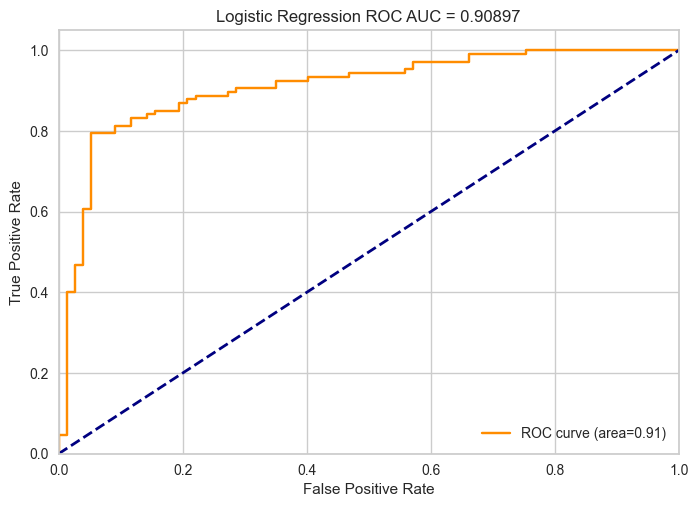

In [258]:
fpr, tpr, thresholds = roc_curve(test[y], y_score_nb)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right')
plt.show()

#### Metrics

In [259]:
metrics['GaussianNB'] = [roc_auc_score(test[y],y_score_nb),
                         precision_score(test[y],y_pred_nb),
                         recall_score(test[y],y_pred_nb),
                         f1_score(test[y],y_pred_nb),
                         log_loss(test[y],y_pred_nb)]

In [260]:
metrics

catboost  random_forest  logistic_regression  \
roc_auc          0.941619       0.939252             0.902415   
precision_score  0.913462       0.921569             0.914894   
recall_score     0.887850       0.878505             0.803738   
f1_score         0.900474       0.899522             0.855721   
log_loss         4.113678       4.113678             5.680793   

                 gradient_boosting  GaussianNB  
roc_auc                   0.938828    0.908970  
precision_score           0.920000    0.882353  
recall_score              0.859813    0.841121  
f1_score                  0.888889    0.861244  
log_loss                  4.505457    5.680793

#### Conlucsion

Here we can see that GaussianNB is not the best model as PyCaret said me before.

Let's save it to our test table to a new column 'y_pred_naivebayes'

In [263]:
test['y_pred_naivebayes'] = y_pred_nb

In [264]:
test.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
668  63.0  0.0            1.0      140.0        195.0        0.0         1.0   
30   53.0  1.0            2.0      145.0        518.0        0.0         1.0   
377  65.0  1.0            0.0      160.0          0.0        1.0         2.0   
535  56.0  1.0            0.0      130.0          0.0        0.0         0.0   
807  54.0  1.0            1.0      108.0        309.0        0.0         1.0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  y_pred_catboost  \
668  179.0             0.0      0.0       2.0           0.0              0.0   
30   130.0             0.0      0.0       1.0           1.0              1.0   
377  122.0             0.0      1.2       1.0           1.0              1.0   
535  122.0             1.0      1.0       1.0           1.0              1.0   
807  156.0             0.0      0.0       2.0           0.0              0.0   

     y_pred_randforest  y_pred_logregression  y_pred_gradboost  \
668                0.0                   0.0               0.0   
30                 1.0                   0.0               1.0   
377                1.0                   1.0               1.0   
535                1.0                   1.0               1.0   
807                0.0                   0.0               0.0   

     y_pred_naivebayes  
668                0.0  
30                 1.0  
377                1.0  
535                1.0  
807                0.0

# Feature importances

Let's use CatBoost model to see on feature importances

In [270]:
feat_importances = model_cb.get_feature_importance(prettified=True)
feat_importances

Feature Id  Importances
0         ST_Slope    20.104045
1          Oldpeak    13.175263
2      Cholesterol    10.430647
3    ChestPainType     9.779070
4              Age     9.156822
5            MaxHR     9.128398
6        RestingBP     6.689542
7              Sex     6.062920
8   ExerciseAngina     5.389664
9       RestingECG     5.174940
10       FastingBS     4.908691

<Axes: >

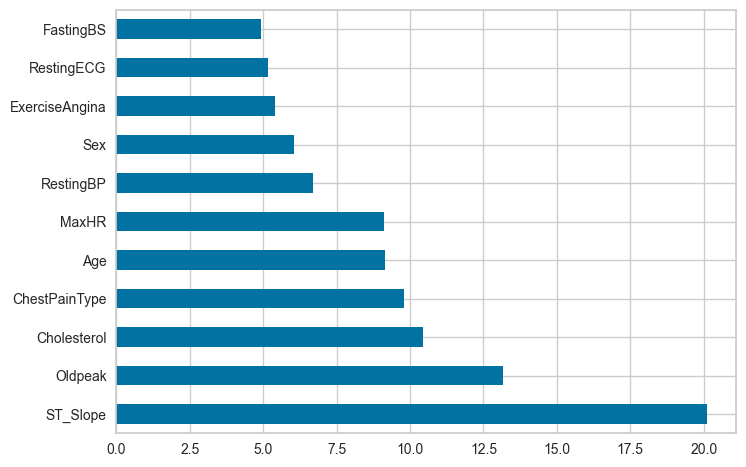

In [271]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(model_cb.feature_importances_, index=X)
feat_importances.nlargest(20).plot(kind='barh')

# It's time for opTUNA!

In [273]:
def objective(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False
    )
    model.fit(train_data)
    y_pred = model.predict(test[X])
    return accuracy_score(test[y], y_pred)

In [274]:
import optuna
from optuna.samplers import TPESampler


optuna.logging.set_verbosity(optuna.logging.WARNING)

from tqdm.notebook import trange, tqdm
for i in tqdm(range(100), colour='blue'):

        sampler = TPESampler(seed=1)
        study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
        study.optimize(objective, n_trials=5)
        pass

  0%|          | 0/100 [00:00<?, ?it/s]

In [279]:
study.best_params

{'iterations': 718,
 'learning_rate': 0.0466929533152365,
 'depth': 4,
 'l2_leaf_reg': 0.31728033064508887,
 'bootstrap_type': 'Bayesian',
 'random_strength': 7.938707489172784,
 'bagging_temperature': 7.481656543798394,
 'od_type': 'Iter',
 'od_wait': 14}

In [281]:
best_params_ = {'iterations': 718,
 'learning_rate': 0.0466929533152365,
 'depth': 4,
 'l2_leaf_reg': 0.31728033064508887,
 'bootstrap_type': 'Bayesian',
 'random_strength': 7.938707489172784,
 'bagging_temperature': 7.481656543798394,
 'od_type': 'Iter',
 'od_wait': 14}

In [280]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  5

Best trial:

  Value:  0.8967391304347826

  Params: 

    iterations: 718

    learning_rate: 0.0466929533152365

    depth: 4

    l2_leaf_reg: 0.31728033064508887

    bootstrap_type: Bayesian

    random_strength: 7.938707489172784

    bagging_temperature: 7.481656543798394

    od_type: Iter

    od_wait: 14


In [282]:
model = CatBoostClassifier(**best_params_, verbose=False)
model.fit(train_data)
y_pred_catboost_optuna = model.predict(test[X])

In [283]:
print(classification_report(test[y], y_pred_catboost_optuna))

              precision    recall  f1-score   support



         0.0       0.86      0.90      0.88        77

         1.0       0.92      0.90      0.91       107



    accuracy                           0.90       184

   macro avg       0.89      0.90      0.89       184

weighted avg       0.90      0.90      0.90       184




In [284]:
y_score_catboost_optuna = model.predict_proba(test[X])[:,1]
metrics['CatBoostOptuna'] = [roc_auc_score(test[y],y_score_catboost_optuna),
                         precision_score(test[y],y_pred_catboost_optuna),
                         recall_score(test[y],y_pred_catboost_optuna),
                         f1_score(test[y],y_pred_catboost_optuna),
                         log_loss(test[y],y_pred_catboost_optuna)]

In [285]:
metrics

catboost  random_forest  logistic_regression  \
roc_auc          0.941619       0.939252             0.902415   
precision_score  0.913462       0.921569             0.914894   
recall_score     0.887850       0.878505             0.803738   
f1_score         0.900474       0.899522             0.855721   
log_loss         4.113678       4.113678             5.680793   

                 gradient_boosting  GaussianNB  CatBoostOptuna  
roc_auc                   0.938828    0.908970        0.938706  
precision_score           0.920000    0.882353        0.923077  
recall_score              0.859813    0.841121        0.897196  
f1_score                  0.888889    0.861244        0.909953  
log_loss                  4.505457    5.680793        3.721899

And finally lets take a look at confusion matrix of all models

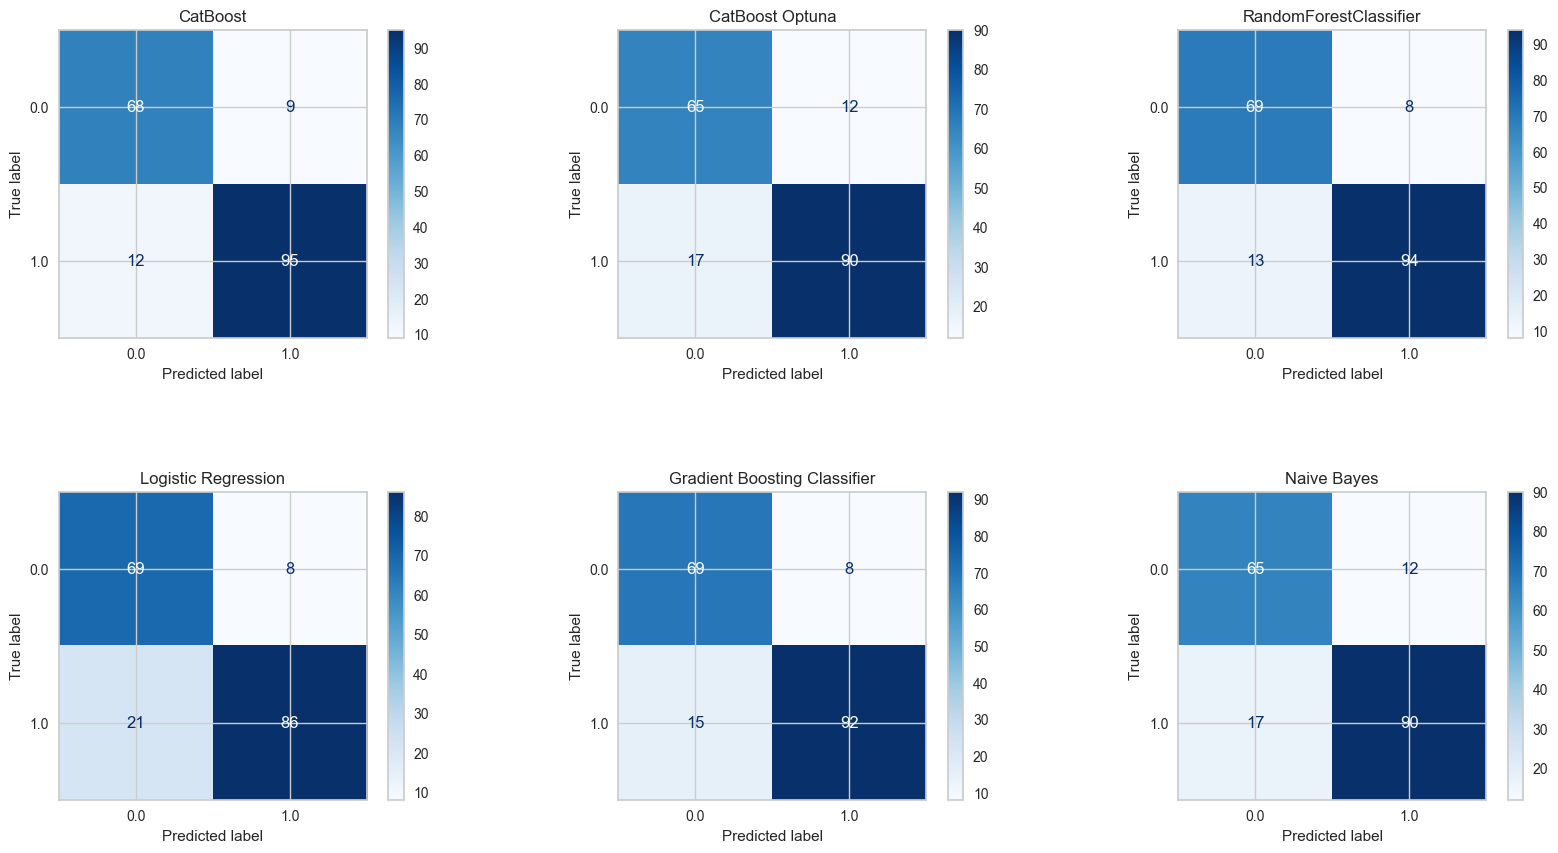

In [287]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# define the models and their names
models = {
    'CatBoost': model_cb,
    'CatBoost Optuna': model,
    'RandomForestClassifier': model_rf,
    'Logistic Regression':model_lr_grid,
    'Gradient Boosting Classifier': model_gb,
    'Naive Bayes': model_nb
}

# create a subplot grid with 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# iterate over the models and plot the confusion matrix in the corresponding subplot
for i, (name, model) in enumerate(models.items()):
    row = i // 3
    col = i % 3
    disp = ConfusionMatrixDisplay.from_estimator(model, test[X], test[y], cmap='Blues', ax=axs[row, col])
    disp.ax_.set_title(name)

# adjust the layout
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# show the plot
plt.show()

# SHAP

In [295]:
import shap
shap.initjs()

In [297]:
explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(test[X])

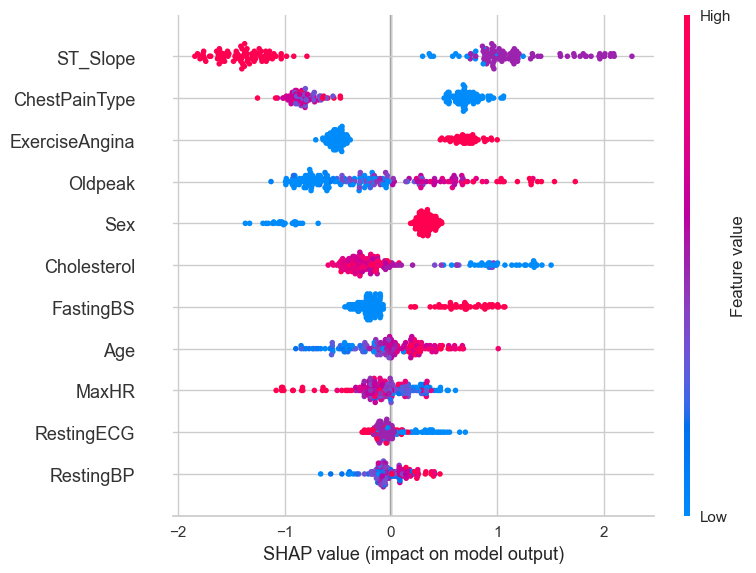

In [298]:
shap.summary_plot(shap_values, test[X])